In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import re
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn import metrics

# Predicting the "Genre" of book from summaries

Today, we are trying to predict the genre from its summaries. The data is from [CMU Book Summaries Corpus](http://www.cs.cmu.edu/~dbamman/booksummaries.html), and it includes 16,559 books. Each of books may have more than one genre. To make our prediction be concisely, I simplify the genre from 227 genres to 5 genres. I name them as target genres, and each book only was predicted as one genre.

## Data Preparation

Read the data first, and use tab-separate to the format. Also, I will named them with 6 variables.

In [2]:
names = ['wid', 'fid', 'title', 'author', 'date', 'genres', 'summary']

books = pd.read_csv("/Users/garyhsu/portfolio-CHIAHAOHSU-byte/portfolio-3/data/booksummaries/booksummaries.txt", sep="\t", header=None, names=names, keep_default_na=False)
books.head()

,wid,fid,title,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,,,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


# Filter the column 'genres' into only include target_genres

In [3]:
target_genres = ["Children's literature",
                 'Science Fiction',
                 'Novel',
                 'Fantasy',
                 'Mystery']

# create a Series of empty strings the same length as the list of books
genre = pd.Series(np.repeat("", books.shape[0]))
# look for each target genre and set the corresponding entries in the genre series to the genre label
for g in target_genres:
    genre[books['genres'].str.contains(g)] = g

# add this to the book dataframe and then select only those rows that have a genre label
# drop some useless columns
books['genre'] = genre
genre_books = books[genre!=''].drop(['genres', 'fid'], axis=1)

genre_books.shape

(8954, 6)

Show how many books we have in each genre category

In [4]:
genre_books.groupby('genre').count()

,wid,title,author,date,summary
genre,,,,,
Children's literature,1092,1092,1092,1092,1092
Fantasy,2311,2311,2311,2311,2311
Mystery,1396,1396,1396,1396,1396
Novel,2258,2258,2258,2258,2258
Science Fiction,1897,1897,1897,1897,1897


## Modelling

In [5]:
genre_books

,wid,title,author,date,summary,genre
0,620,Animal Farm,George Orwell,1945-08-17,"Old Major, the old boar on the Manor Farm, ca...",Children's literature
1,843,A Clockwork Orange,Anthony Burgess,1962,"Alex, a teenager living in near-future Englan...",Novel
2,986,The Plague,Albert Camus,1947,The text of The Plague is divided into five p...,Novel
4,2080,A Fire Upon the Deep,Vernor Vinge,,The novel posits that space around the Milky ...,Fantasy
6,2890,A Wizard of Earthsea,Ursula K. Le Guin,1968,"Ged is a young boy on Gont, one of the larger...",Fantasy
...,...,...,...,...,...,...
16525,34890405,Beautiful Creatures,Margaret Stohl,2009-12-01,Beautiful Creatures is set in fictional Gatli...,Fantasy
16526,34890908,Beautiful Chaos,Gary Russell,,"After returning home, more strange things are...",Fantasy
16531,35311147,Guardians of Ga'Hoole Book 4: The Siege,Helen Dunmore,2004-05-01,==Receptio,Fantasy
16532,35471510,The Casual Vacancy,J. K. Rowling,2012-09-27,"The novel is split into seven parts, the firs...",Fantasy


Turn all the word from summary into lower case.

In [6]:
genre_books['summary']=genre_books['summary'].apply(lambda x: x.lower())

# Removing stop words with NLTK.

In [7]:
stop = stopwords.words('english')
genre_books['summary'] = genre_books['summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
words = set(nltk.corpus.words.words())

Turn those words it in a list.

In [8]:
genre_books['summary']=genre_books['summary'].tolist()

Creating a new dataframe from those words in summary.

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
X = count_vectorizer.fit_transform(genre_books['summary'])
wv=pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())
wv.drop(wv.iloc[:,-344:], inplace = True, axis = 1)
wv.drop(wv.iloc[:,0:1237], inplace = True, axis = 1)
wv.head()

,aa,aaa,aachan,aachen,aachim,aaden,aaian,aames,aann,aanthor,...,zymas,zymun,zyngo,zyperis,zyrene,zyrgon,zyrgonians,zz,zzumalak,zzyzx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Check whether there is a word occurrence more than once in whole summaries.

In [10]:
x=wv.columns[0:].value_counts()>1
x.unique()

array([False])

All words only appear once in those summaries.

# Split the dataset (Training dataset=80%, Testing dataset=20% )

In [11]:
X = wv[wv.columns[2:]]
y = genre_books['genre']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
X_train.head()

,aachan,aachen,aachim,aaden,aaian,aames,aann,aanthor,aari,aaron,...,zymas,zymun,zyngo,zyperis,zyrene,zyrgon,zyrgonians,zz,zzumalak,zzyzx
43,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4160,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model : Linear Regression

In [12]:
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Make a classification report.

In [14]:
# Evaluate the model
print(classification_report(y_test,predictions))

                       precision    recall  f1-score   support

Children's literature       0.55      0.46      0.50       234
              Fantasy       0.73      0.73      0.73       445
              Mystery       0.75      0.68      0.71       306
                Novel       0.62      0.71      0.66       437
      Science Fiction       0.69      0.70      0.70       369

             accuracy                           0.67      1791
            macro avg       0.67      0.66      0.66      1791
         weighted avg       0.68      0.67      0.67      1791



The Children's literature was mis-classified. Also, the Novel have the same issue.
Comparing those genres, the Mystery performs the best in these genres.  

Confusion matrix, without normalization
[[107  39  13  60  15]
 [ 28 324  10  32  51]
 [ 21  15 208  48  14]
 [ 34  24  32 310  37]
 [  5  39  14  52 259]]


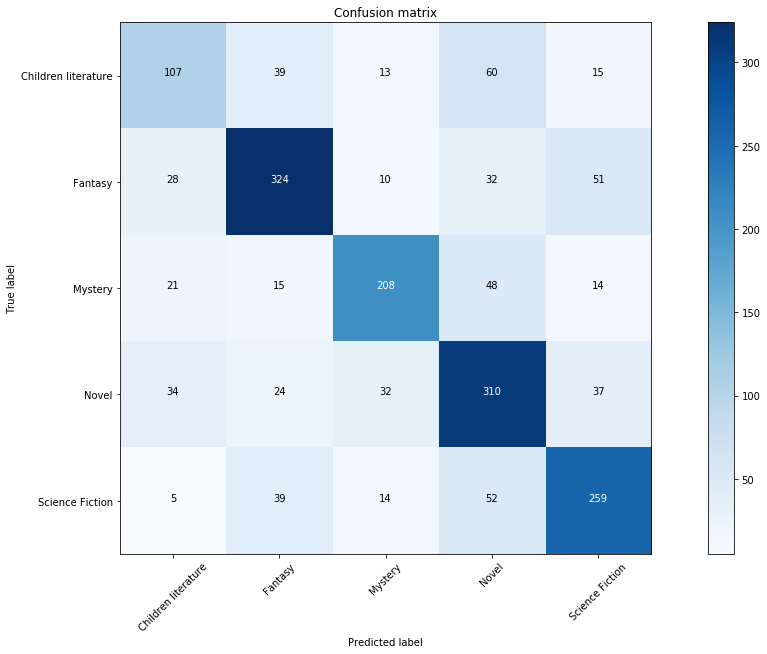

In [15]:
plt.figure(figsize=(16, 9))
cnf_matrix = metrics.confusion_matrix(y_test,predictions)
target_names = ['Children literature', 'Fantasy', 'Mystery', 'Novel','Science Fiction']

plot_confusion_matrix(cnf_matrix, classes=target_names)
plt.show()

* In this confusion matrix, we can know that there are too many the genre of Children's literature  were recognized as Novel.
* Many books from Fantasy were recognized as Science Fiction, maybe some words in these two genres have same meaning.
* A lot of book from Mystery were recognized as Novel. I think it is a normal issue because sometimes both genres have the same properties in the summary.
* The Novel were recognized wrong equally because the definition of novel is too general. Every component can be recognized as Novel. So, that is the reason why the prediction of Novel do not perform well.
* The genre of Science Fiction were recognized as Fantasy. I think that maybe the component in Novel and Science Fiction is get rid of reality, so it may have so many book were recognized wrong.